In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/tesla.csv')
df
print("Dataset loaded successfully..!!")

Dataset loaded successfully..!!


**Unit test - 01 (Target Variable Label encoding)**

In [ ]:
df['Trend'] = ['Uptrend' if df['Close'].iloc[i] > df['Close'].iloc[i - 1] else 'Downtrend'
               for i in range(len(df))]
df['Trend'].iloc[0] = 'Neutral'
df['Trend_Label'] = df['Trend'].map({'Uptrend': 1, 'Downtrend': 0, 'Neutral': 0})
df.head()

<ipython-input-362-426e04a84e24>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Trend'].iloc[0] = 'Neutral'
<ipython-input-362-426e04a84e24>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame


,Date,Open,High,Low,Close,Volume,Adj Close,Trend,Trend_Label
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999,Neutral,0
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000,Downtrend,0
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999,Downtrend,0
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001,Downtrend,0
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001,Downtrend,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Trend_Label'] = label_encoder.fit_transform(df['Trend_Label'])


In [ ]:
df=df.drop(columns='Trend')
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Trend_Label
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999,0
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000,0
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999,0
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001,0
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001,0


**Unit Test - 02 (Removing Unncessary Features from the Dataset)**

In [ ]:
df['Close-Open'] = df['Close'] - df['Open']
df['High-Low'] = df['High'] - df['Low']

In [ ]:
features=['Open','Close','Volume','High','Low','Close-Open','High-Low']

In [ ]:
train_size = int(0.8 * len(df))  #Splitting
train_data = df[:train_size]
test_data = df[train_size:]

In [ ]:
X=train_data[features]
y=train_data['Trend_Label']

In [ ]:
x_test=test_data[features]
y_test=test_data['Trend_Label']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=2022)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 
0.8082595870206489
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       165
           1       0.85      0.76      0.80       174

    accuracy                           0.81       339
   macro avg       0.81      0.81      0.81       339
weighted avg       0.81      0.81      0.81       339

Logistic Regression Confusion Matrix:
[[142  23]
 [ 42 132]]


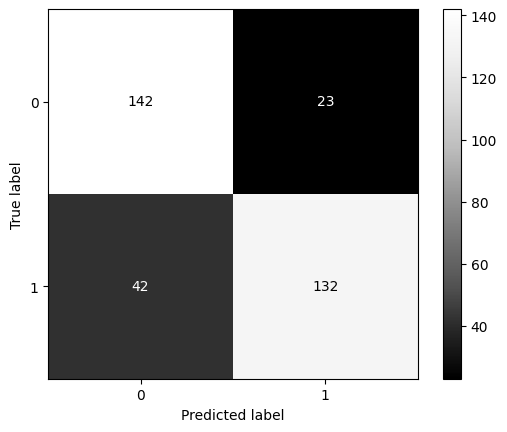

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_predictions = logreg.predict(x_test)
print("Accuracy: ")
print(logreg.score(x_test, y_test))

print("Logistic Regression Classification Report:")
print(classification_report(y_test, logreg_predictions))

cm_logreg = confusion_matrix(y_test, logreg_predictions)
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=logreg.classes_)
disp_logreg.plot(cmap='Greys_r')
print("Logistic Regression Confusion Matrix:")
print(cm_logreg)

**Unit Test - 03 (Normalization or Scaling features for SVM)**

In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(x_test)

In [ ]:
svm = SVC(kernel='linear',probability=True)
svm.fit(X_train_scaled, y_train)
svm_predictions = svm.predict(X_test_scaled)

SVM Confusion Matrix:
[[ 69  96]
 [  5 169]]


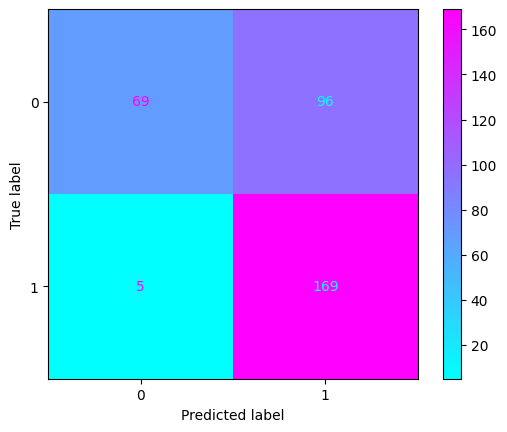

In [ ]:
cm_svm = confusion_matrix(y_test, svm_predictions)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm.classes_)
disp_svm.plot(cmap='cool')
print("SVM Confusion Matrix:")
print(cm_svm)


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.42      0.58       165
           1       0.64      0.97      0.77       174

    accuracy                           0.70       339
   macro avg       0.79      0.69      0.67       339
weighted avg       0.78      0.70      0.68       339

SVM Confusion Matrix:
[[ 69  96]
 [  5 169]]


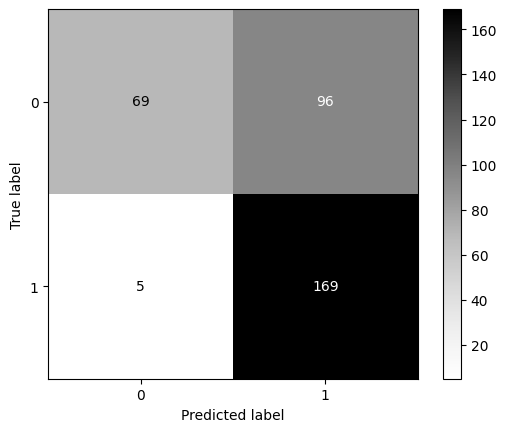

In [ ]:
svm_predictions = svm.predict(X_test_scaled)
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))
cm_svm = confusion_matrix(y_test, svm_predictions)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm.classes_)
disp_svm.plot(cmap='Greys')
print("SVM Confusion Matrix:")
print(cm_svm)

**Unit Test - 04 (XGBoost)**

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

data = pd.read_csv("tesla.csv")
print("\nDataset Loaded!")

X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2, random_state=42)

print("\nData Split:")
print(f"Training Data: {X_train.shape}")
print(f"Testing Data: {x_test.shape}")
print(f"Validation Data: {X_valid.shape}")



Dataset Loaded!

Data Split:
Training Data: (1082, 3)
Testing Data: (339, 3)
Validation Data: (271, 3)


In [ ]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

print(f"Training Data: {X_train_scaled}")
print(f"Validation Data: {X_valid_scaled}")



Training Data: [[ 1.0257316   1.03436222  0.26160758]
 [ 1.41979564  1.35733633  0.43338713]
 [-0.83209141 -0.84997592 -0.47885202]
 ...
 [ 1.5973445   1.54493216 -0.13606942]
 [ 0.08431435  0.09713557  2.08328184]
 [ 0.87523362  1.01384069  0.6774461 ]]
Validation Data: [[-9.75397202e-01 -9.72998316e-01 -8.49545565e-01]
 [-8.33594234e-01 -8.37297614e-01 -7.12773323e-01]
 [ 1.36730386e+00  1.47702801e+00  1.08327637e+00]
 [-8.50763309e-02 -9.94854493e-02  6.12392466e-01]
 [ 1.07468096e+00  1.05445420e+00  7.74724574e-01]
 [ 1.61634480e+00  1.65667298e+00 -5.00292111e-01]
 [ 1.16442154e+00  1.27675396e+00  1.41393691e+00]
 [ 1.30450703e+00  1.34766651e+00  3.39624483e-01]
 [-8.37565995e-01 -8.35578524e-01 -7.90725520e-01]
 [ 5.96243600e-01  5.88365710e-01  2.61564438e-01]
 [-8.31339954e-01 -8.33322185e-01 -6.39264443e-01]
 [-8.36492565e-01 -8.39339024e-01 -7.84276238e-01]
 [ 1.45564906e+00  1.42781918e+00 -1.01687626e-01]
 [ 1.11085625e+00  1.05842954e+00  2.97125530e+00]
 [ 3.05767424e

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from xgboost import plot_importance
import xgboost as xgb


# Define data_dmatrix
data_dmatrix = xgb.DMatrix(data=X, label=y)

# Split into training and testing sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# split X and y into training and testing sets
print("\nData Split:")
print(f"Training Data: {X_train.shape}")
print(f"Validation Data: {X_valid.shape}")



Data Split:
Training Data: (1081, 7)
Validation Data: (271, 7)


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)


Cross-Validation and Model Optimization

With Hyperparameters

In [ ]:


print("\nData Split Complete!")
print(f"Training Data Shape: {X_train.shape}")
print(f"Validation Data Shape: {X_valid.shape}")

# Convert the dataset into DMatrix (XGBoost's internal data structure)
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)

# Define parameter grid for XGBoost
param = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 5,
    'learning_rate': 0.1,
    # 'n_estimators': 100,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

# Perform cross-validation using XGBoost's cv method
cv_results = xgb.cv(
    param,
    dtrain,
    num_boost_round=1000,
    nfold=3,
    metrics={'logloss'},
    early_stopping_rounds=10,
    seed=42
)

# Get the best number of boosting rounds
best_num_rounds = cv_results['test-logloss-mean'].idxmin()
print(f"\nBest Number of Boosting Rounds: {best_num_rounds}")

# Train the model using the best number of boosting rounds
model = xgb.train(
    param,
    dtrain,
    num_boost_round=best_num_rounds
)

# Make predictions on the validation set
y_pred_proba = model.predict(dvalid)
y_pred = (y_pred_proba > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_valid, y_pred)
print(f"\nAccuracy (with XGBoost cv tuning): {accuracy:.2f}")







Data Split Complete!
Training Data Shape: (1081, 7)
Validation Data Shape: (271, 7)

Best Number of Boosting Rounds: 41

Accuracy (with XGBoost cv tuning): 0.84


Without hyperparameters

In [ ]:
# Train the model with default parameters (no hyperparameters specified)
model = xgb.train({}, dtrain, num_boost_round=100)

# Make predictions on the validation set
y_pred_proba = model.predict(dvalid)
y_pred = (y_pred_proba > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_valid, y_pred)
print(f"\nAccuracy (without hyperparameter tuning): {accuracy:.2f}")



Accuracy (without hyperparameter tuning): 0.80


GridSearchCV for hyperparameter tuning and Evaluation of XGBoost Classifier

In [ ]:
from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score


# Custom wrapper class for XGBClassifier
class XGBClassifierWrapper(BaseEstimator):
    def __init__(self, **params):
        # Pass all received parameters to the XGBClassifier
        self.model = xgb.XGBClassifier(**params)

    def fit(self, X, y):
        self.model.fit(X, y)
        return self

    def predict(self, X):
        return self.model.predict(X)

    def set_params(self, **params):
        # Ensure that parameters are correctly passed to the XGBClassifier
        self.model.set_params(**params)
        return self



# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the custom wrapper model
xgb_clf_wrapper = XGBClassifierWrapper()

# Create a GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_clf_wrapper, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the model on the training data using GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and estimator from GridSearchCV
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict and evaluate on training data
train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)

# Predict and evaluate on testing data
test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)

# Print results
print(f"Best Parameters: {best_params}")
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.8}
Training Accuracy: 0.9250693802035153
Testing Accuracy: 0.8571428571428571


**Unit Test - 5: Comparision of all models on test data**

Testing accuracy for hyperparameter used model

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       199
           1       0.85      0.87      0.86       207

    accuracy                           0.85       406
   macro avg       0.85      0.85      0.85       406
weighted avg       0.85      0.85      0.85       406

Logistic Regression Confusion Matrix:
[[166  33]
 [ 27 180]]


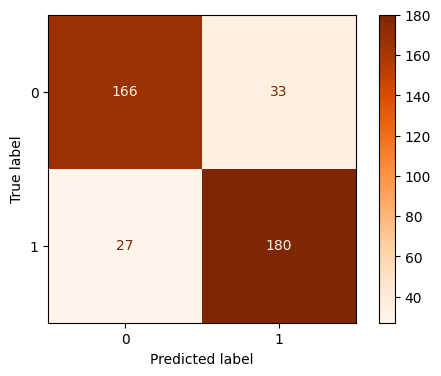

In [ ]:
##Testing part
logreg_predictions = logreg.predict(x_test)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, logreg_predictions))

cm_logreg = confusion_matrix(y_test, logreg_predictions)
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=logreg.classes_)
disp_logreg.plot(cmap='Oranges')
print("Logistic Regression Confusion Matrix:")
print(cm_logreg)

In [ ]:
svm = SVC(kernel='poly',C=100,coef0=1.0,degree=4,gamma='scale',probability=True)
svm.fit(X_train, y_train)
svm_predictions = svm.predict(x_test)

In [ ]:
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       199
           1       0.85      0.84      0.84       207

    accuracy                           0.84       406
   macro avg       0.84      0.84      0.84       406
weighted avg       0.84      0.84      0.84       406



SVM Confusion Matrix:
[[168  31]
 [ 33 174]]


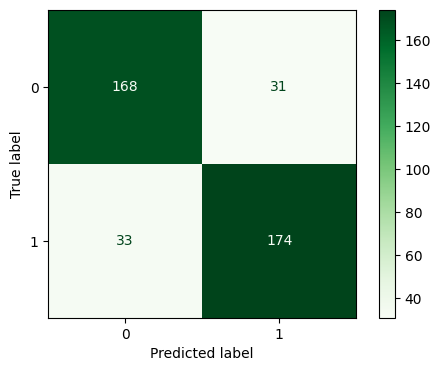

In [ ]:
cm_svm = confusion_matrix(y_test, svm_predictions)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm.classes_)
disp_svm.plot(cmap='Greens')
print("SVM Confusion Matrix:")
print(cm_svm)

In [ ]:
from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score


# Custom wrapper class for XGBClassifier
class XGBClassifierWrapper(BaseEstimator):
    def __init__(self, **params):
        # Pass all received parameters to the XGBClassifier
        self.model = xgb.XGBClassifier(**params)

    def fit(self, X, y):
        self.model.fit(X, y)
        return self

    def predict(self, X):
        return self.model.predict(X)

    def set_params(self, **params):
        # Ensure that parameters are correctly passed to the XGBClassifier
        self.model.set_params(**params)
        return self



# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the custom wrapper model
xgb_clf_wrapper = XGBClassifierWrapper()

# Create a GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_clf_wrapper, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the model on the training data using GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and estimator from GridSearchCV
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict and evaluate on training data
train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)

# Predict and evaluate on testing data
test_pred = best_model.predict(x_test)
test_accuracy = accuracy_score(y_test, test_pred)

# Print results
print(f"Best Parameters: {best_params}")
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.8}
Training Accuracy: 0.9250693802035153
Testing Accuracy: 0.8571428571428571
